<a href="https://colab.research.google.com/github/ziad-mohamed-7/MIA_Tasks/blob/main/Task1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK1.2- Image Segmentation**

## **1. Importing Libraries**

In [1]:
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## **2. Loading Image:**

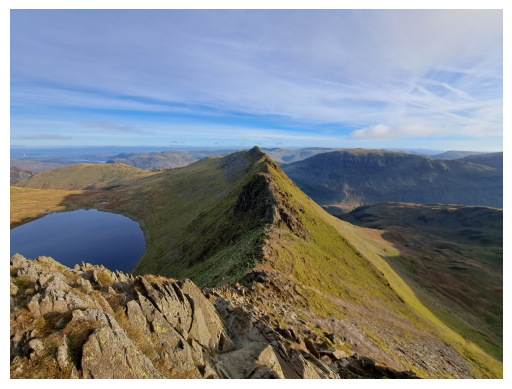

In [2]:
# loading image from a url
image_url = 'https://raw.githubusercontent.com/jdhwilkins/Image-Segmentation-K-Means/main/helvellyn.jpg'
image = io.imread(image_url)

# showing original image
plt.imshow(image)
plt.axis('off')
plt.show()

## **3. Preprocessing Image:**

In [3]:
# flatten image to 2D array of pixels
X = image.reshape(-1, 3)

## **4. Defining K-Means Function:**

In [4]:
def kmeans_seg(image, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # get segmented image
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

## **5. Experiment with Different Values of K:**

In [5]:
k_values = [2, 5, 10, 20]  # example k values
segmented_images = [] # empty list to append segmented images to

for k in k_values:
    segmented_image = kmeans_seg(image, k)
    segmented_images.append(segmented_image)


## **6. Displaying Results:**



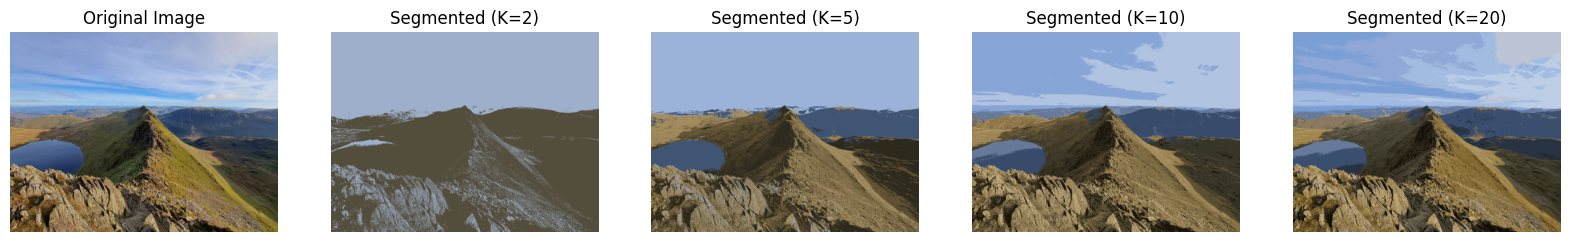

In [6]:
# plotting original vs segmented images
plt.figure(figsize=(20, 10))
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(image / 255)
plt.axis('off')
plt.title('Original Image')

for i, k in enumerate(k_values):
    plt.subplot(1, len(k_values) + 1, i + 2)
    plt.imshow(segmented_images[i] / 255)
    plt.axis('off')
    plt.title(f'Segmented (K={k})')

plt.show()



### **K-Means Clustering Results:**

In this task, I applied K-Means clustering to segment an image based on color similarity. Below are the results for different values of **K** (the number of clusters):

> K = 2
- The image is segmented into **2 dominant colors**.
-  resulted in a very simplified segmentation, where large regions of the image are grouped together, losing much of the detail.

> K = 5
- The image is segmented into **5 color clusters**.
- This provided a bit more visibility, capturing some of the main colors in the image but still simplifying it significantly.

> K = 10
- With **10 clusters**, the segmentation captures a more detailed range of colors.
- This provided a better balance between simplification and maintaining some visual details of the original image.

> K = 20
- At **20 clusters**, the image retains a high level of detail.
- The segmentation closely resembled the original image, with each color cluster capturing finer color variations.

### **Conclusion:**
- Increasing the value of **K** results in more detailed and finer segmentation.
- **Lower K values** simplify the image more aggressively, while **higher K values** retain more of the image’s original color complexity.
